# **PROJETO DE DATA SCIENCE**
#**Qualidade do Sono (1/2): Estatística Descritiva e Inferencial**



O Conjunto de Dados sobre Saúde e Estilo de Vida do Sono consiste em 400 linhas e 13 colunas, abrangendo uma ampla gama de variáveis relacionadas ao sono e hábitos diários. Inclui detalhes como gênero, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC, pressão arterial, frequência cardíaca, passos diários e a presença ou ausência de distúrbios do sono.

**Principais Recursos do Conjunto de Dados:**

* Métricas Abrangentes de Sono: Explore a duração do sono, qualidade e fatores que influenciam os padrões de sono.

* Fatores de Estilo de Vida: Analise os níveis de atividade física, níveis de estresse e categorias de IMC.

* Saúde Cardiovascular: Examine as medições de pressão arterial e frequência cardíaca.

* Análise de Distúrbios do Sono: Identifique a ocorrência de distúrbios do sono, como Insônia e Apneia do Sono.

**Colunas do Conjunto de Dados:**

* ID da Pessoa: Um identificador para cada indivíduo.
* Gênero: O gênero da pessoa (Masculino/Feminino).
* Idade: A idade da pessoa em anos.
* Ocupação: A ocupação ou profissão da pessoa.
* Duração do Sono (horas): O número de horas que a pessoa dorme por dia.
* Qualidade do Sono (escala: 1-10): Uma classificação subjetiva da qualidade do sono, variando de 1 a 10.
* Nível de Atividade Física (minutos/dia): O número de minutos que a pessoa se dedica à atividade física diariamente.
* Nível de Estresse (escala: 1-10): Uma classificação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10.
* Categoria de IMC: A categoria de IMC da pessoa (por exemplo, Abaixo do Peso, Normal, Sobrepeso).
* Pressão Arterial (sistólica/diastólica): A medida da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.
* Frequência Cardíaca (bpm): A frequência cardíaca de repouso da pessoa em batimentos por minuto.
* Passos Diários: O número de passos que a pessoa dá por dia.
* Distúrbio do Sono: A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do Sono).

**Detalhes sobre a Coluna de Distúrbio do Sono:**

* Nenhum: O indivíduo não apresenta nenhum distúrbio do sono específico.
* Insônia: O indivíduo tem dificuldade para dormir ou permanecer dormindo, resultando em sono inadequado ou de má qualidade.
* Apneia do Sono: O indivíduo sofre pausas na respiração durante o sono, resultando em padrões de sono interrompidos e potenciais riscos à saúde.

**Link de acesso no kaggle:**
 <https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data>

#**Importando Pacotes**

In [2]:
!pip install -U pingouin
!pip install pandas-flavor==0.1.1
import math
import pandas_flavor as pf
import pandas as pd
import numpy as np
#from numpy.testing import supress_warnings
import numpy.linalg
import numpy.linalg._umath_linalg
#import numpy.linalg._unmath_linalg._ilp64
import pingouin as pg
import sklearn
import scipy.stats as sct
from scipy.stats import norm
#from numpy.testing import suppr
from scipy import constants
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 739.6 kB/s eta 0:00:00
  Attempting uninstall: pandas-flavor
    Found existing installation: pandas-flavor 0.6.0
    Uninstalling pandas-flavor-0.6.0:
      Successfully uninstalled pandas-flavor-0.6.0


#**Importando o Banco de Dados**

In [3]:
df_sleep = pd.read_csv('/content/drive/MyDrive/Projeto_Tomorrow/Sleep_health_and_lifestyle_dataset.csv')
df_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df_sleep.shape

(374, 13)

In [5]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#**Tratamento dos Dados**

### Dados faltantes

In [6]:
df_sleep.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Os dados faltantes na coluna 'Sleep Disorder' indicam que o indivíduo não possui distúrbio do sono. Vamos substituir a ausência de dados pela palavra "Normal".

In [7]:
df_sleep['Sleep Disorder'] = df_sleep['Sleep Disorder'].fillna(value = 'Normal')
df_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Tratando a coluna 'BMI Category'

A coluna 'BMI Category' possui duas categorias que expressam a mesma informação 'Normal' e 'Normal Weight'. Vamos padronizar para a categoria para 'Normal'.

In [8]:
print(df_sleep['BMI Category'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [9]:
df_sleep['BMI Category'] = df_sleep['BMI Category'].replace({'Normal Weight': 'Normal'})
print(df_sleep['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


### Dividindo a coluna 'Blood Pressure' em 'Systolic Pressure' e 'Diastolic Pressure'

In [10]:
df_sleep[['Systolic Pressure', 'Diastolic Pressure']] = df_sleep['Blood Pressure'].str.split('/', expand=True)

Convertendo as colunas criadas para o tipo int

In [11]:
df_sleep['Systolic Pressure'] = df_sleep['Systolic Pressure'].astype(int)
df_sleep['Diastolic Pressure'] = df_sleep['Diastolic Pressure'].astype(int)

### Criando uma variável categórica para classificar a pressão:

* 'Normal' - se 'Sistolic Pressure' estiver entre [120-129] e 'Diastolic Pressure' estiver entre [80, 94]

* 'Abnormal' - caso contrário

Criando uma coluna booleana para auxiliar na classificação


In [12]:
df_sleep['is_normal'] = (df_sleep['Systolic Pressure'].between(120, 129)) & (df_sleep['Diastolic Pressure'].between(80, 94))

Utilizando a função map para mapear e substituir os valores na coluna 'Blood Pressure'


In [13]:
df_sleep['Blood Pressure'] = df_sleep['is_normal'].map({True: 'Normal', False: 'Abnormal'})

Deletando as colunas desnecessárias


In [14]:
df_sleep.drop(columns=['is_normal'], inplace=True)

In [15]:
df_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,Normal,77,4200,Normal,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,Normal,75,10000,Normal,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,Normal,75,10000,Normal,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,Abnormal,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,Abnormal,85,3000,Sleep Apnea,140,90


#**Análise Exploratória dos Dados**

## **Gráficos das Variáveis Categóricas e Quantitativas**

### **Frequência absoluta e relativa das variáveis categóricas: 'Gender', 'BMI Category', 'Blood Pressure' e 'Sleep Disorder'**

Frequência Absoluta

In [16]:
absoluta_gender = df_sleep['Gender'].value_counts()
absoluta_bmi = df_sleep['BMI Category'].value_counts()
absoluta_bp = df_sleep['Blood Pressure'].value_counts()
absoluta_sleep = df_sleep['Sleep Disorder'].value_counts()

Frequência Relativa

In [17]:
relativa_gender = df_sleep['Gender'].value_counts(normalize=True).round(2)
relativa_bmi = df_sleep['BMI Category'].value_counts(normalize=True).round(2)
relativa_bp = df_sleep['Blood Pressure'].value_counts(normalize=True).round(2)
relativa_sleep = df_sleep['Sleep Disorder'].value_counts(normalize=True).round(2)

Formando uma tabela com as informações das Frequências Absolutas e Relativas

In [18]:
tab_gender = pd.DataFrame({'Frequência': absoluta_gender, 'Porcentagem(%)': relativa_gender})
tab_gender

,Frequência,Porcentagem(%)
Gender,,
Male,189,0.51
Female,185,0.49


In [19]:
tab_bmi = pd.DataFrame({'Frequência': absoluta_bmi, 'Porcentagem(%)': relativa_bmi})
tab_bmi

,Frequência,Porcentagem(%)
BMI Category,,
Normal,216,0.58
Overweight,148,0.40
Obese,10,0.03


In [20]:
tab_bp = pd.DataFrame({'Frequência': absoluta_bp, 'Porcentagem(%)': relativa_bp})
tab_bp

,Frequência,Porcentagem(%)
Blood Pressure,,
Abnormal,250,0.67
Normal,124,0.33


In [21]:
tab_sleep = pd.DataFrame({'Frequência': absoluta_sleep, 'Porcentagem(%)': relativa_sleep})
tab_sleep

,Frequência,Porcentagem(%)
Sleep Disorder,,
Normal,219,0.59
Sleep Apnea,78,0.21
Insomnia,77,0.21


Construindo gráficos pieplot para as variáveis categóricas

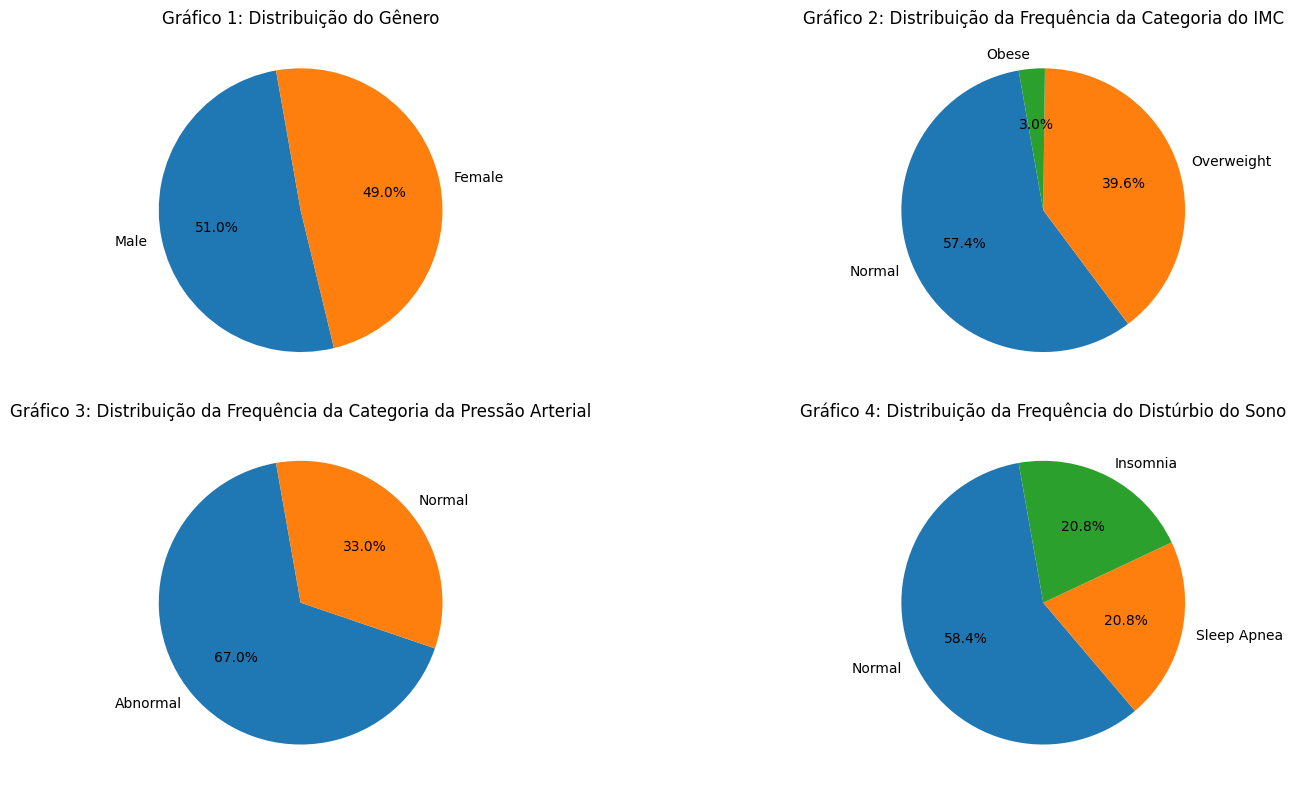

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

# Gender
axs[0,0].pie(tab_gender['Porcentagem(%)'], labels=tab_gender.index, autopct='%1.1f%%', startangle=100)
axs[0,0].set_title('Gráfico 1: Distribuição do Gênero')

# BMI Category
axs[0,1].pie(tab_bmi['Porcentagem(%)'], labels=tab_bmi.index, autopct='%1.1f%%', startangle=100)
axs[0,1].set_title('Gráfico 2: Distribuição da Frequência da Categoria do IMC')

# Blood Pressure
axs[1,0].pie(tab_bp['Porcentagem(%)'], labels=tab_bp.index, autopct='%1.1f%%', startangle=100)
axs[1,0].set_title('Gráfico 3: Distribuição da Frequência da Categoria da Pressão Arterial')

# Sleep Disorder
axs[1,1].pie(tab_sleep['Porcentagem(%)'], labels=tab_sleep.index, autopct='%1.1f%%', startangle=100)
axs[1,1].set_title('Gráfico 4: Distribuição da Frequência do Distúrbio do Sono')

plt.tight_layout()

### Histograma das Variáveis Quantitativas



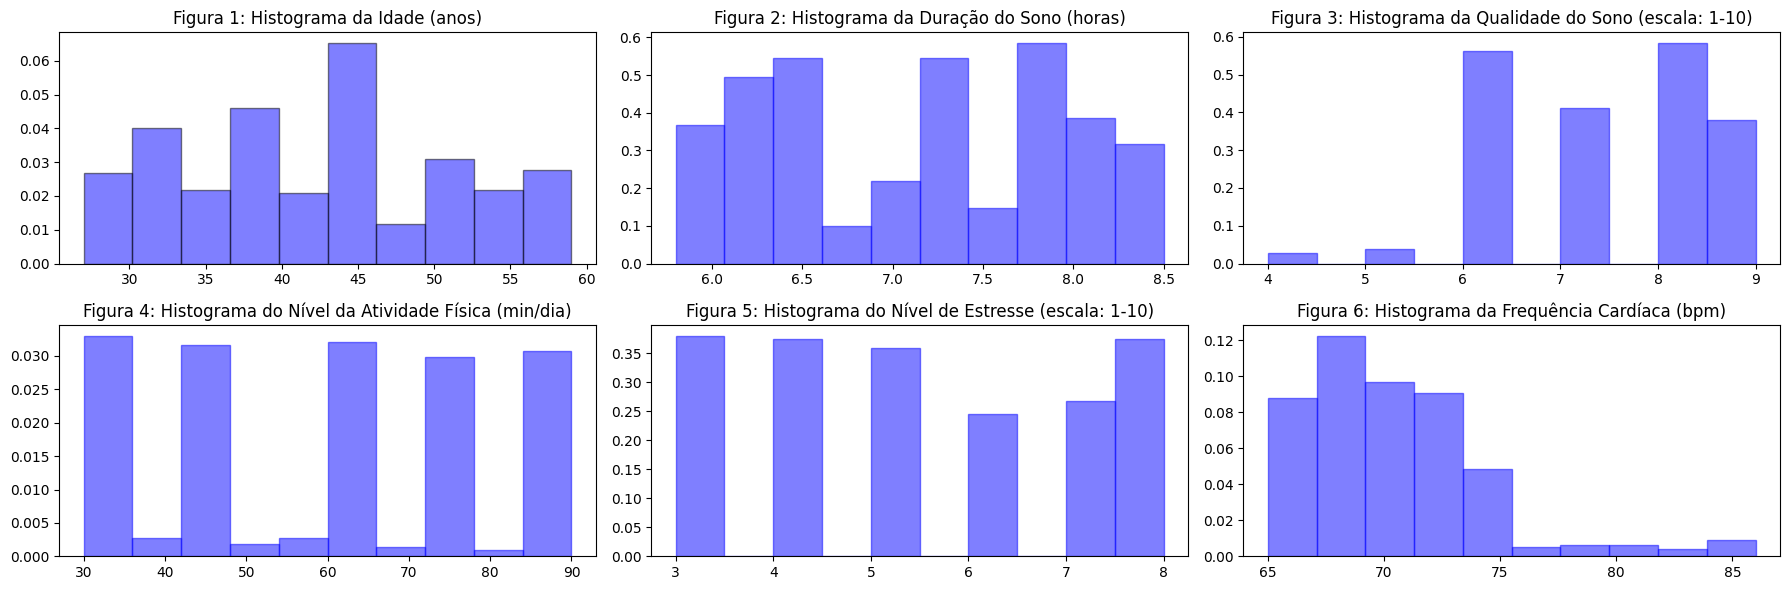

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

#Histograma da Idade
axs[0,0].hist(data = df_sleep, x ='Age', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
axs[0,0].set_title('Figura 1: Histograma da Idade (anos)')

#Histograma da Duração do Sono
axs[0,1].hist(data = df_sleep, x ='Sleep Duration', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
axs[0,1].set_title('Figura 2: Histograma da Duração do Sono (horas)')

#Histograma da Qualidade do Sono
axs[0,2].hist(data = df_sleep, x ='Quality of Sleep', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
axs[0,2].set_title('Figura 3: Histograma da Qualidade do Sono (escala: 1-10)')

#Histograma do Nível da Atividade Física
axs[1,0].hist(data = df_sleep, x ='Physical Activity Level', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
axs[1,0].set_title('Figura 4: Histograma do Nível da Atividade Física (min/dia)')

#Histograma do Nível de Estresse
axs[1,1].hist(data = df_sleep, x ='Stress Level', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
axs[1,1].set_title('Figura 5: Histograma do Nível de Estresse (escala: 1-10)')

#Histograma da Frequência Cardíaca
axs[1,2].hist(data = df_sleep, x ='Heart Rate', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density = True, alpha = .5)
axs[1,2].set_title('Figura 6: Histograma da Frequência Cardíaca (bpm)')

plt.tight_layout()

**Interpretação dos Resultados**

Do total de pessoas do banco de dados, 189 (51,0%) são homens e 185 (49,0%) são mulheres, como pode ser observado no Gráfico 01. Desses indivíduos, 57,4% apresentaram um IMC normal, 33,0% apresentaram uma pressão arterial dentro da normalidade e 58,4% não apresentaram distúrbios do sono. Por meio dos gráficos 2 a 4, é possível observar esses resultados.


Analisando o histograma das variáveis quantitativas, por meio das figuras 1 a 6, é possível notar que a maioria dos indivíduos está na faixa dos 35 a 50 anos; a duração do sono está mais concentrada na faixa de 6 a 6 horas e meia; a maioria classifica sua qualidade de sono como 8 ou 9; todos praticam pelo menos 30min de atividade física por dia; o nível de estresse, numa escala de 1 a 10, está mais equilibrado nas faixas de 3 a 5; e, por fim, a frequência cardíaca da maioria está nas faixa de 65 a 75 bpm.




## **Estatística Descritiva**

Definindo as variáveis que serão analisadas

In [24]:
df_est_descr = df_sleep[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']]

### **Medidas de Posição (média, mediana, moda)**

In [25]:
media = df_est_descr.mean().round(2)
mediana = df_est_descr.median().round(2)
moda = df_est_descr.mode().round(2).iloc[0]

In [26]:
tab_med_posicao = pd.DataFrame({
    'Variável': df_est_descr.columns,
    'Média': media.values,
    'Mediana': mediana.values,
    'Moda': moda.values
})

tab_med_posicao

,Variável,Média,Mediana,Moda
0,Age,42.18,43.0,43.0
1,Sleep Duration,7.13,7.2,7.2
2,Quality of Sleep,7.31,7.0,8.0
3,Physical Activity Level,59.17,60.0,60.0
4,Stress Level,5.39,5.0,3.0
5,Heart Rate,70.17,70.0,68.0
6,Daily Steps,6816.84,7000.0,8000.0
7,Systolic Pressure,128.55,130.0,130.0
8,Diastolic Pressure,84.65,85.0,80.0


**Interpretação**

* *Idade:* A idade média das pessoas no conjunto de dados é de aproximadamente 42 anos, com a maioria das idades concentradas em torno de 43 anos.

* *Duração do Sono:* A média de duração do sono das pessoas no conjunto de dados é de cerca de 7.13 horas, com a maioria das pessoas dormindo em torno de 7.2 horas.

* *Qualidade do Sono:* A qualidade média do sono das pessoas no conjunto de dados é de aproximadamente 7.31 em uma escala de 1 a 10, com a moda indicando que 8 é o valor mais frequente para a qualidade do sono.

* *Nível de Atividade Física*: A média do nível de atividade física das pessoas no conjunto de dados é de aproximadamente 59.17 minutos por dia, com a maioria das pessoas dedicando cerca de 60 minutos por dia à atividade física.

* *Nível de Estresse*: O nível médio de estresse das pessoas no conjunto de dados é de aproximadamente 5.39 em uma escala de 1 a 10, com a moda indicando que 3 é o valor mais frequente para o nível de estresse.

* *Frequência Cardíaca*: A média da frequência cardíaca das pessoas no conjunto de dados é de aproximadamente 70.17 batimentos por minuto, com a moda indicando que 68 batimentos por minuto são os mais frequentes.

* *Passos Diários*: A média de passos diários das pessoas no conjunto de dados é de aproximadamente 6816.84, com a maioria das pessoas dando em torno de 7000 passos por dia.

* *Pressão Sistólica*: A média da pressão arterial sistólica das pessoas no conjunto de dados é de aproximadamente 128.55 mmHg, com a maioria das leituras em torno de 130.0 mmHg.

* *Pressão Diastólica*: A média da pressão arterial diastólica das pessoas no conjunto de dados é de aproximadamente 84.65 mmHg, com a moda indicando que 80.0 mmHg é o valor mais frequente.

### **Medidas de Dispersão (Variância, Desvio Padrão, Coeficiente de Variação)**

In [27]:
variancia = df_est_descr.var().round(2)
desv_pad = df_est_descr.std().round(2)
coef_var = (desv_pad / media * 100).round(2)

In [28]:
tab_med_dispersao = pd.DataFrame({
    'Variável': df_est_descr.columns,
    'Variância': variancia.values,
    'Desvio Padrão': desv_pad.values,
    'Coeficiente de Variação (%)': coef_var.values
})

tab_med_dispersao

,Variável,Variância,Desvio Padrão,Coeficiente de Variação (%)
0,Age,75.22,8.67,20.55
1,Sleep Duration,0.63,0.80,11.22
2,Quality of Sleep,1.43,1.20,16.42
3,Physical Activity Level,433.92,20.83,35.20
4,Stress Level,3.15,1.77,32.84
5,Heart Rate,17.10,4.14,5.90
6,Daily Steps,2617651.14,1617.92,23.73
7,Systolic Pressure,60.03,7.75,6.03
8,Diastolic Pressure,37.97,6.16,7.28


**Interpretação**

* *Variância:* Indica a dispersão dos valores (é o dp ao quadrado);

* *Desvio Padrão:* Indica a dispersão dos valores em torno da média;

* *Coeficiente de Variação:* Indica a variabilidade relativa em relação à média.

### **Percentil (.25, .50, .75)**

In [29]:
percentil = df_est_descr.quantile([.25, .50, .75])
percentil

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure
0.25,35.25,6.4,6.0,45.0,4.0,68.0,5600.0,125.0,80.0
0.50,43.00,7.2,7.0,60.0,5.0,70.0,7000.0,130.0,85.0
0.75,50.00,7.8,8.0,75.0,7.0,72.0,8000.0,135.0,90.0


**Interpretação**

* *Idade:* 25% das pessoas têm 35 anos ou menos, 50% têm 43 anos ou menos (sendo 43 a mediana), e 25% têm 50 anos ou menos.

* *Duração do Sono:* 25% das pessoas dormem 6.4 horas ou menos, 50% dormem 7.2 horas ou menos (sendo 7.2 a mediana), e 25% dormem 7.8 horas ou menos.

* *Qualidade do Sono:* 25% das pessoas têm uma qualidade de sono de 6.0 ou menos, 50% têm uma qualidade de sono de 7.0 ou menos (sendo 7.0 a mediana), e 25% têm uma qualidade de sono de 8.0 ou menos.

* *Nível de Atividade Física*: 25% das pessoas praticam até 45.0 minutos de atividade física por dia, 50% praticam até 60.0 minutos e 75% praticam até 75.0 minutos.

* *Nível de Estresse*: 25% das pessoas têm um nível de estresse de 4.0 ou menos, 50% têm um nível de estresse de 5.0 ou menos (sendo 5.0 a mediana), e 25% têm um nível de estresse de 7.0 ou menos.

* *Frequência Cardíaca*: 25% das pessoas têm uma frequência cardíaca de até 68.0 batimentos por minuto, 50% têm até 70.0 e 75% têm até 72.0.

* *Passos Diários*: 25% das pessoas dão até 5600.0 passos por dia, 50% dão até 7000.0 e 75% dão até 8000.0.

* *Pressão Sistólica*: 25% das pessoas têm uma pressão arterial sistólica de até 125.0 mmHg, 50% têm até 130.0 e 75% têm até 135.0.

* *Pressão Diastólica*: 25% das pessoas têm uma pressão arterial diastólica de até 80.0 mmHg, 50% têm até 85.0 e 75% têm até 90.0.


### **Boxplot**

Text(0.5, 1.0, 'Figura 9: Boxplot da Pressão Diastólica')

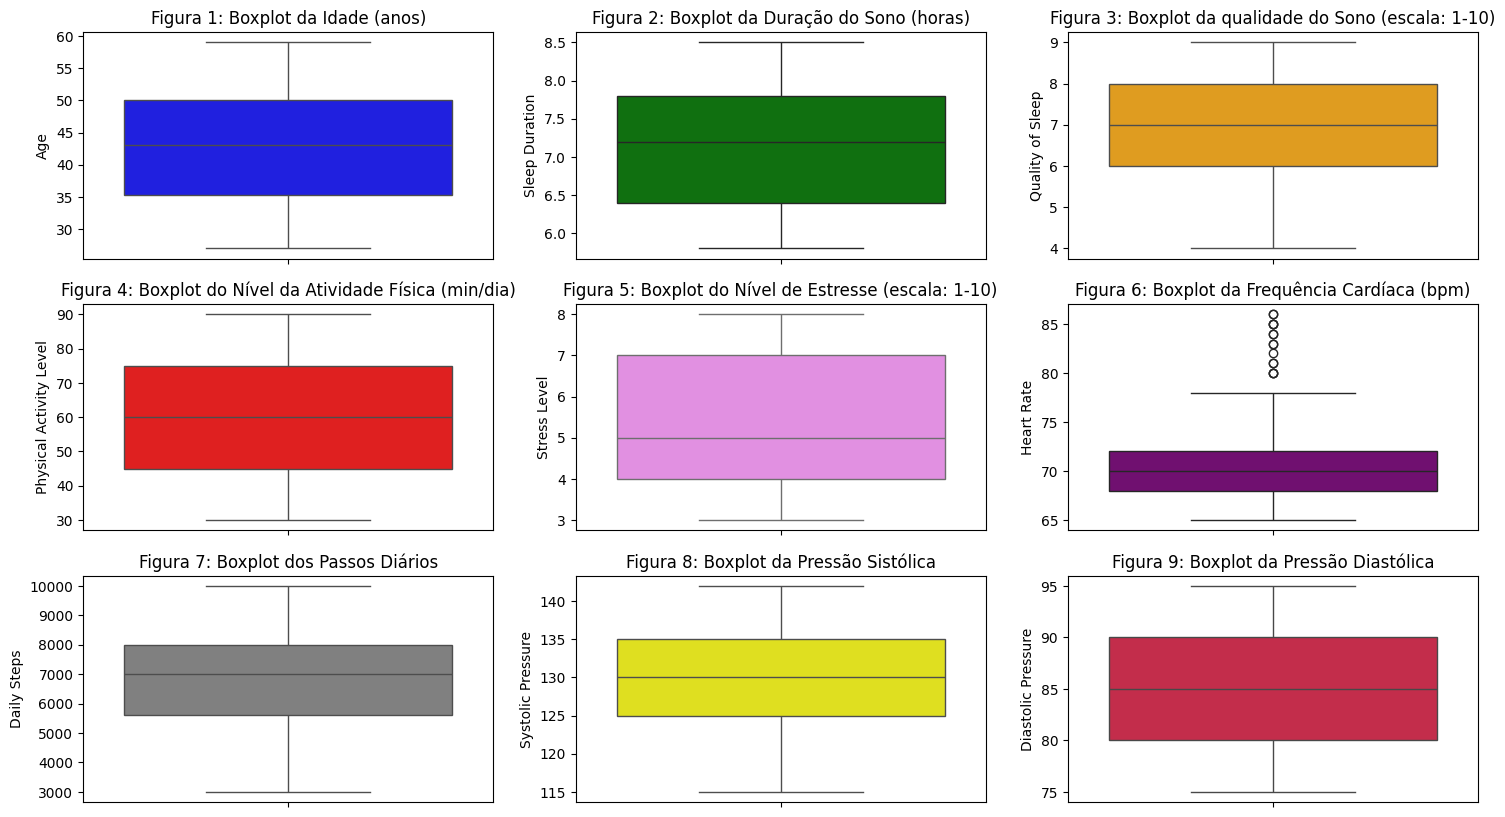

In [30]:
fig, axs = plt.subplots(3, 3, figsize=(18, 10))

#Boxplot da Idade
sns.boxplot(data=df_sleep, y='Age', ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Figura 1: Boxplot da Idade (anos)')

#Boxplot da Duração do Sono
sns.boxplot(data=df_sleep, y='Sleep Duration', ax=axs[0, 1], color='green')
axs[0, 1].set_title('Figura 2: Boxplot da Duração do Sono (horas)')

#Boxplot da Qualidade do Sono
sns.boxplot(data=df_sleep, y='Quality of Sleep', ax=axs[0, 2], color='orange')
axs[0, 2].set_title('Figura 3: Boxplot da qualidade do Sono (escala: 1-10)')

#Boxplot da Nível da Atividade Física
sns.boxplot(data=df_sleep, y='Physical Activity Level', ax=axs[1, 0], color='red')
axs[1, 0].set_title('Figura 4: Boxplot do Nível da Atividade Física (min/dia)')

#Boxplot da Nível de Estresse
sns.boxplot(data=df_sleep, y='Stress Level', ax=axs[1, 1], color='violet')
axs[1, 1].set_title('Figura 5: Boxplot do Nível de Estresse (escala: 1-10)')

#Boxplot da Frequência Cardíaca
sns.boxplot(data=df_sleep, y='Heart Rate', ax=axs[1, 2], color='purple')
axs[1, 2].set_title('Figura 6: Boxplot da Frequência Cardíaca (bpm)')

#Boxplot dos Passos Diários
sns.boxplot(data=df_sleep, y='Daily Steps', ax=axs[2, 0], color='grey')
axs[2, 0].set_title('Figura 7: Boxplot dos Passos Diários')

#Boxplot da Pressão Sistólica
sns.boxplot(data=df_sleep, y='Systolic Pressure', ax=axs[2, 1], color='yellow')
axs[2, 1].set_title('Figura 8: Boxplot da Pressão Sistólica')

#Boxplot da Pressão Diastólica
sns.boxplot(data=df_sleep, y='Diastolic Pressure', ax=axs[2, 2], color='crimson')
axs[2, 2].set_title('Figura 9: Boxplot da Pressão Diastólica')


### **Análises Bivariada**

#### **Variáveis Qualitativas**

Distúrbio do Sono por Gênero

In [31]:
cross_genero_disturbio = pd.crosstab(df_sleep['Gender'], df_sleep['Sleep Disorder'], margins=True)
cross_genero_disturbio

Sleep Disorder,Insomnia,Normal,Sleep Apnea,All
Gender,,,,
Female,36,82,67,185
Male,41,137,11,189
All,77,219,78,374


Distúrbio do Sono por IMC

In [32]:
cross_imc_disturbio = pd.crosstab(df_sleep['BMI Category'], df_sleep['Sleep Disorder'], margins=True)
cross_imc_disturbio

Sleep Disorder,Insomnia,Normal,Sleep Apnea,All
BMI Category,,,,
Normal,9,200,7,216
Obese,4,0,6,10
Overweight,64,19,65,148
All,77,219,78,374


Distúrbio do Sono por Pressão Sanguínea

In [33]:
cross_bp_disturbio = pd.crosstab(df_sleep['Blood Pressure'], df_sleep['Sleep Disorder'], margins=True)
cross_bp_disturbio

Sleep Disorder,Insomnia,Normal,Sleep Apnea,All
Blood Pressure,,,,
Abnormal,74,101,75,250
Normal,3,118,3,124
All,77,219,78,374


#### **Variáveis Quantitativas**

Qualidade do Sono vs Nível de Atividade Física

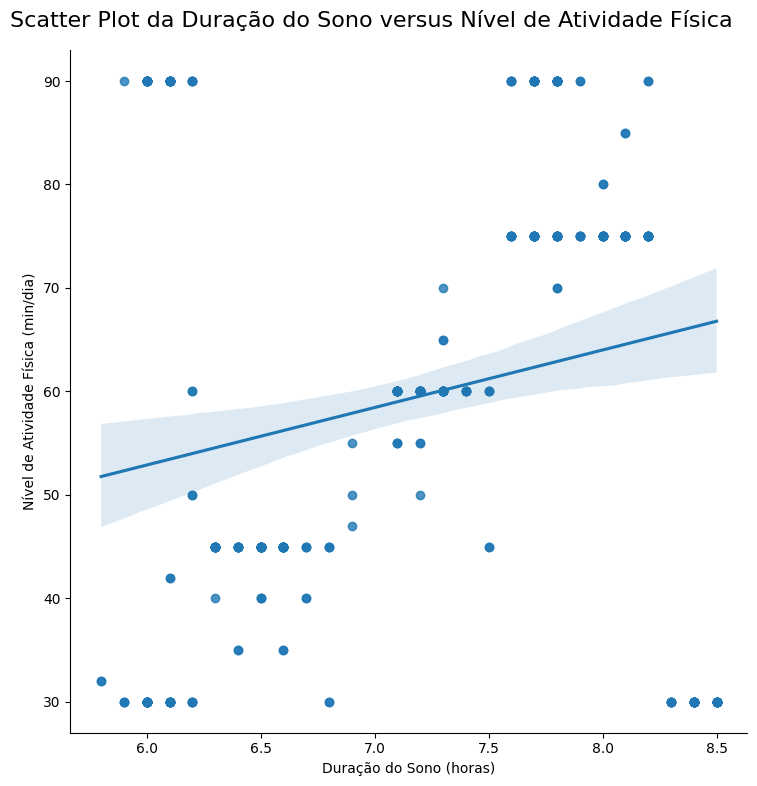

In [34]:
ax = sns.lmplot(x="Sleep Duration", y="Physical Activity Level", data=df_sleep)
ax.fig.set_size_inches(8, 8)
ax.fig.suptitle('Scatter Plot da Duração do Sono versus Nível de Atividade Física', fontsize=16, y=1.02)
ax.set_xlabels("Duração do Sono (horas)", fontsize=10)
ax.set_ylabels("Nível de Atividade Física (min/dia)", fontsize=10)
ax

**Interpretação**

À medida que o nível de atividade física aumenta, a duração do sono também aumenta.

Qualidade do Sono vs Nível de Estresse

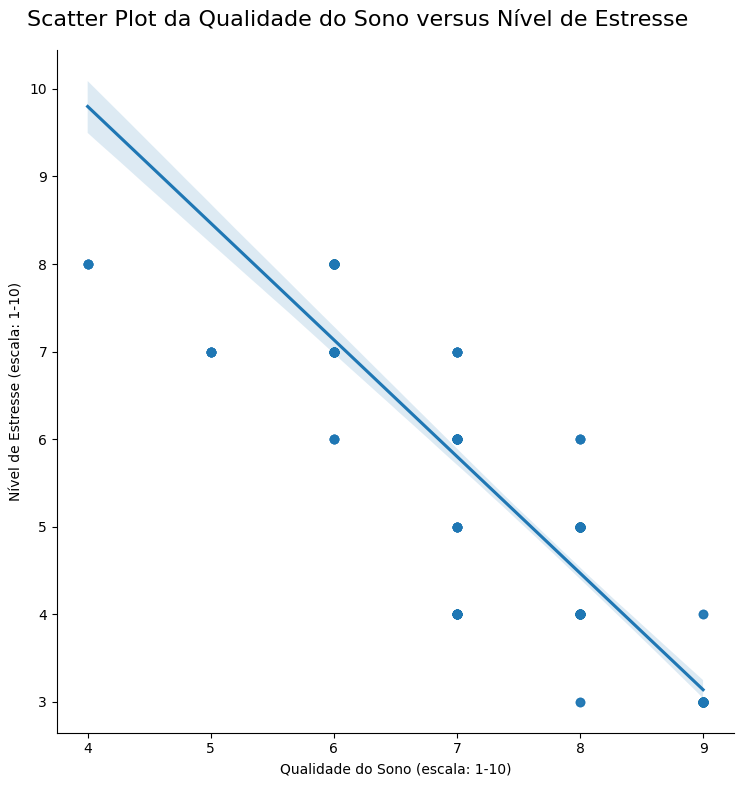

In [35]:
ax = sns.lmplot(x="Quality of Sleep", y="Stress Level", data=df_sleep)
ax.fig.set_size_inches(8, 8)
ax.fig.suptitle('Scatter Plot da Qualidade do Sono versus Nível de Estresse', fontsize=16, y=1.02)
ax.set_xlabels("Qualidade do Sono (escala: 1-10)", fontsize=10)
ax.set_ylabels("Nível de Estresse (escala: 1-10)", fontsize=10)
ax

**Interpretação**

Estresse e qualidade de sono são inversamente proporcionais. À medida que o nível de estresse diminui, a qualidade de sono aumenta.

### **Correlação**

In [36]:
corr_duration_activity = df_sleep['Sleep Duration'].corr(df_sleep['Physical Activity Level']).round(2)
corr_quality_stress = df_sleep['Quality of Sleep'].corr(df_sleep['Stress Level']).round(2)
corr_steps_heart = df_sleep['Daily Steps'].corr(df_sleep['Heart Rate']).round(2)
corr_quality_activity = df_sleep['Quality of Sleep'].corr(df_sleep['Physical Activity Level']).round(2)
corr_activity_heart = df_sleep['Physical Activity Level'].corr(df_sleep['Heart Rate']).round(2)

In [37]:
tab_corr = pd.DataFrame({
    'Duração do Sono x Nível de Atividade Física': corr_duration_activity,
    'Qualidade do Sono x Nível de Estresse': corr_quality_stress,
    'Passos Diários x Frequência Cardíaca': corr_steps_heart,
    'Qualidade do Sono x Nível de Atividade Física': corr_quality_activity,
    'Nível de Atividade Física x Frequência Cardíaca': corr_activity_heart
}, index=['Correlação'])

tab_corr.transpose()

,Correlação
Duração do Sono x Nível de Atividade Física,0.21
Qualidade do Sono x Nível de Estresse,-0.90
Passos Diários x Frequência Cardíaca,-0.03
Qualidade do Sono x Nível de Atividade Física,0.19
Nível de Atividade Física x Frequência Cardíaca,0.14


**Interpretação:**

* *Duração do Sono x Nível de Atividade Física (0.21):*

Existe uma correlação positiva fraca (0.21) entre a duração do sono e o nível de atividade física.
Isso sugere que, em geral, quanto mais tempo alguém passa se exercitando, maior pode ser sua duração do sono, embora a relação não seja muito forte.

* *Qualidade do Sono x Nível de Estresse (-0.90):*

Existe uma correlação negativa forte (-0.90) entre a qualidade do sono e o nível de estresse.
Isso indica que quanto maior o nível de estresse, pior é a qualidade do sono, e vice-versa. A relação é muito significativa.

* *Passos Diários x Frequência Cardíaca (-0.03):*

Existe uma correlação negativa muito fraca (-0.03) entre os passos diários e a frequência cardíaca.
Isso sugere uma relação quase inexistente entre o número de passos dados por dia e a frequência cardíaca.

* *Qualidade do Sono x Nível de Atividade Física (0.19):*

Existe uma correlação positiva fraca (0.19) entre a qualidade do sono e o nível de atividade física.
Isso indica que, em geral, uma melhor qualidade de sono está associada a um nível ligeiramente mais alto de atividade física.

* *Nível de Atividade Física x Frequência Cardíaca (0.14):*

Existe uma correlação positiva fraca (0.14) entre o nível de atividade física e a frequência cardíaca.
Isso sugere que há uma relação leve entre o aumento do nível de atividade física e uma ligeira elevação na frequência cardíaca.

## **Inferência Estatística**

### **Teste de Normalidade**

Verificando a Normalidade das Variáveis do Banco

* **H0:** A variável possui uma distribuição normal

* **H1:** A variável não possui distribuição normal

Se *p-valor > 0.05*, aceita-se a hipótese nula. Isto é, a variável possui uma distribuição normal.

In [38]:
pg.normality(df_est_descr, method='normaltest').round(3)

,W,pval,normal
Age,51.788,0.000,False
Sleep Duration,421.668,0.000,False
Quality of Sleep,25.540,0.000,False
Physical Activity Level,353.229,0.000,False
Stress Level,646.176,0.000,False
Heart Rate,85.853,0.000,False
Daily Steps,5.473,0.065,True
Systolic Pressure,44.329,0.000,False
Diastolic Pressure,43.120,0.000,False


**Interpretação**

Apenas 'Daily Steps' possui uma distribuição normal.

Analisando o teste de normalidade por subgrupos (pessoas com e sem distúrbio de sono):


In [39]:
df_normal = df_sleep.query('`Sleep Disorder` == "Normal"')
pg.normality(df_normal, method='normaltest').round(3)

,W,pval,normal
Person ID,22.999,0.000,False
Age,19.720,0.000,False
Sleep Duration,12.323,0.002,False
Quality of Sleep,24.149,0.000,False
Physical Activity Level,96.684,0.000,False
Stress Level,16.695,0.000,False
Heart Rate,3.890,0.143,True
Daily Steps,51.060,0.000,False
Systolic Pressure,1.174,0.556,True
Diastolic Pressure,32.692,0.000,False


**Interpretação**

No subgrupo de pessoas sem distúrbio de sono, apenas 'Heart Rate' e 'Systolic Pressure' possuem distribuição normal.

In [40]:
df_disturbio = df_sleep.query('`Sleep Disorder` != "Normal"')
pg.normality(df_disturbio, method='normaltest').round(3)

,W,pval,normal
Person ID,19.015,0.000,False
Age,2.785,0.248,True
Sleep Duration,30.195,0.000,False
Quality of Sleep,7.790,0.020,False
Physical Activity Level,1453.992,0.000,False
Stress Level,2415.794,0.000,False
Heart Rate,13.319,0.001,False
Daily Steps,5.642,0.060,True
Systolic Pressure,21.513,0.000,False
Diastolic Pressure,9.093,0.011,False


**Interpretação**

No subgrupo de pessoas com distúrbio de sono, apenas 'Age' e 'Daily Steps' possuem distribuição normal.

#### **Gráficos Para Verificação da Normalidade**

**Histograma**

<Axes: title={'center': 'Histograma dos Passos Diários das Pessoas com Distúrbio do Sono'}, xlabel='Daily Steps', ylabel='Density'>

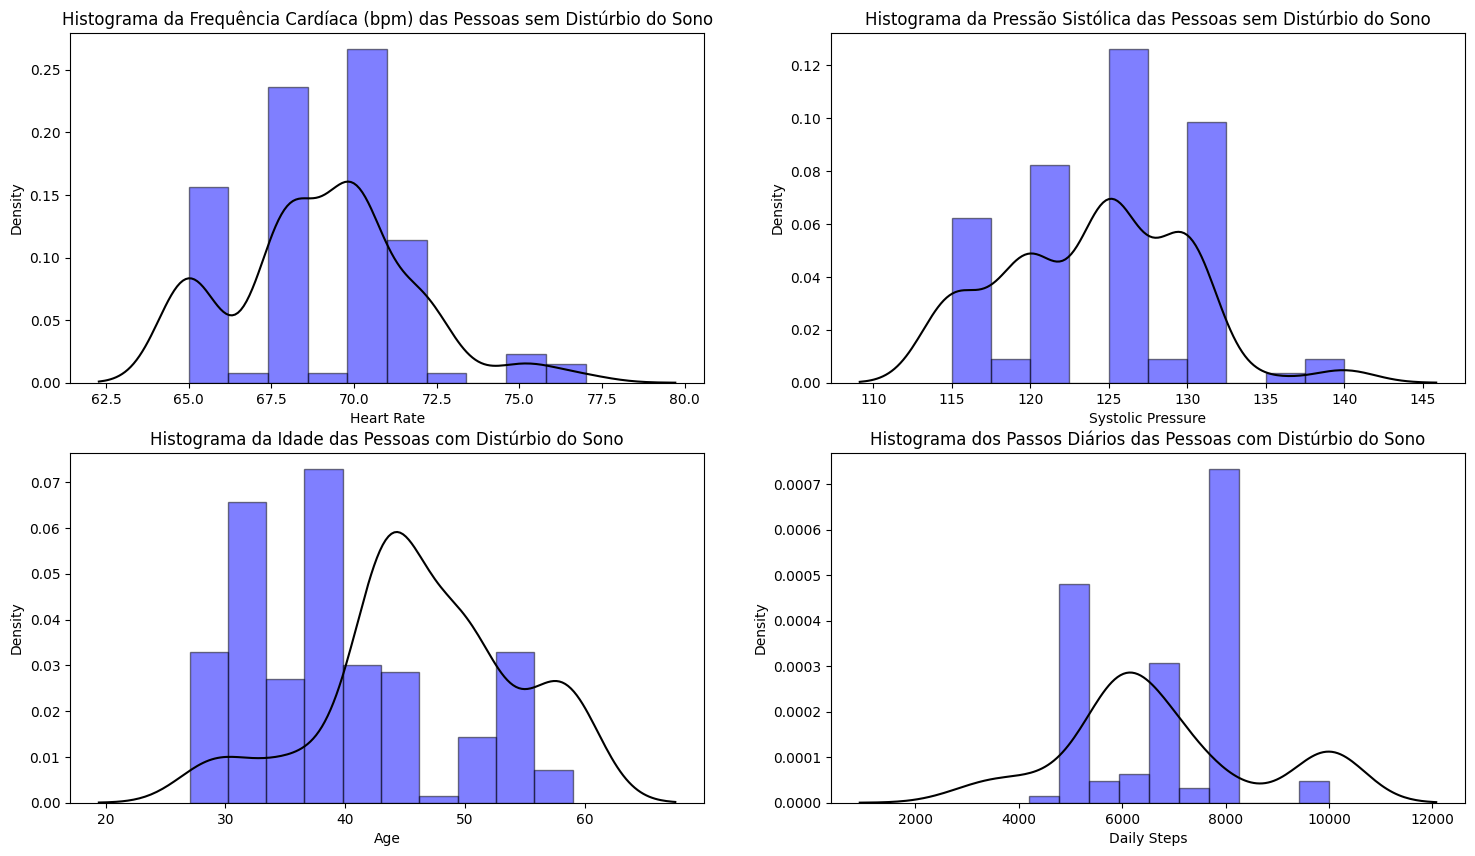

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

#Histograma da Frequência Cardíaca das Pessoas sem Distúrbio do Sono
axs[0,0].hist(data = df_normal, x ='Heart Rate', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
axs[0,0].set_title('Histograma da Frequência Cardíaca (bpm) das Pessoas sem Distúrbio do Sono')
sns.kdeplot(df_normal['Heart Rate'].dropna(), color='black', ax=axs[0,0])

#Histograma da Pressão Sistólica das Pessoas sem Distúrbio do Sono
axs[0,1].hist(data = df_normal, x ='Systolic Pressure', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
axs[0,1].set_title('Histograma da Pressão Sistólica das Pessoas sem Distúrbio do Sono')
sns.kdeplot(df_normal['Systolic Pressure'].dropna(), color='black', ax=axs[0,1])

#Histograma da Idade das pessoas com Distúrbio do Sono
axs[1,0].hist(data = df_normal, x ='Age', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
axs[1,0].set_title('Histograma da Idade das Pessoas com Distúrbio do Sono')
sns.kdeplot(df_disturbio['Age'].dropna(), color='black', ax=axs[1,0])

#Histograma da Passos Diários das pessoas com Distúrbio do Sono
axs[1,1].hist(data = df_normal, x ='Daily Steps', color='blue', histtype='bar', rwidth=2, edgecolor='black', density = True, alpha = .5)
axs[1,1].set_title('Histograma dos Passos Diários das Pessoas com Distúrbio do Sono')
sns.kdeplot(df_disturbio['Daily Steps'].dropna(), color='black', ax=axs[1,1])

**QQ Plot**

Text(0.5, 1.0, 'QQ Plot da Passos Diários das pessoas com Distúrbio do Sono')

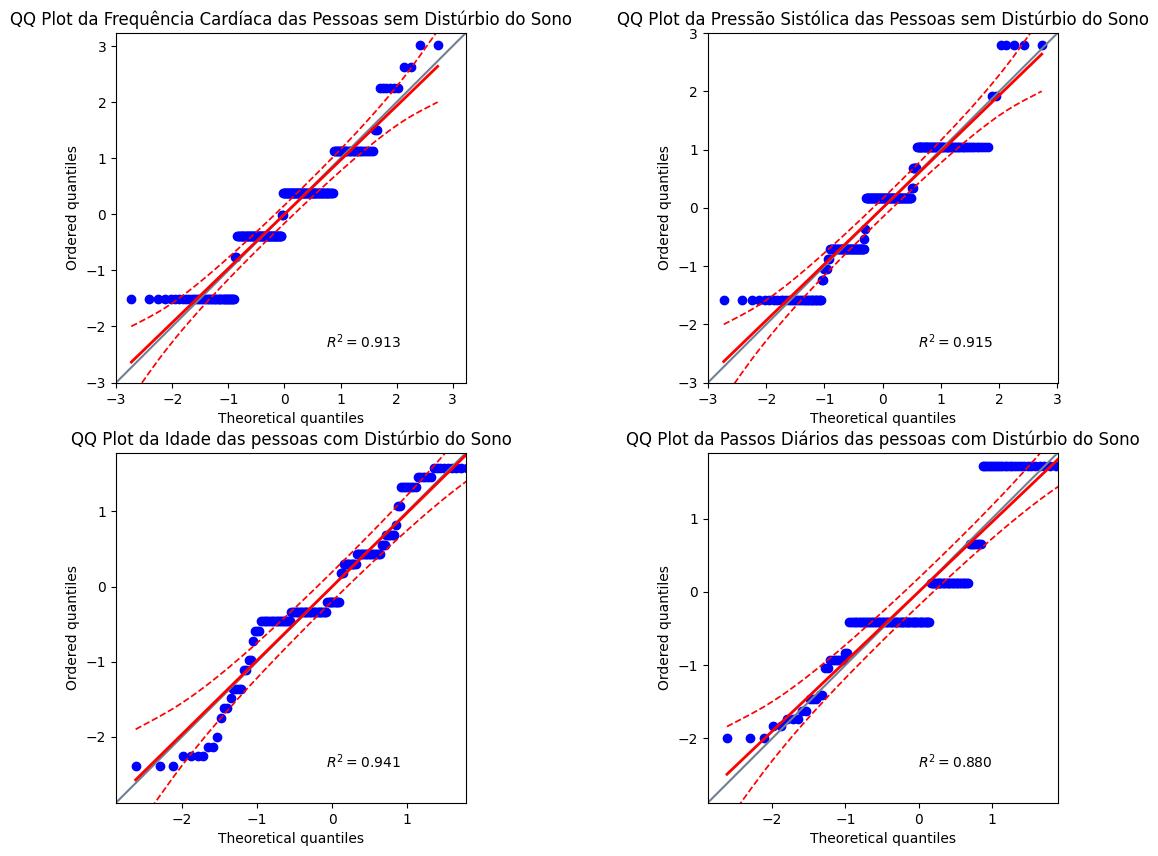

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

#QQ Plot da Frequência Cardíaca das Pessoas sem Distúrbio do Sono
pg.qqplot(df_normal['Heart Rate'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('QQ Plot da Frequência Cardíaca das Pessoas sem Distúrbio do Sono')

#QQ Plot da Pressão Sistólica das Pessoas sem Distúrbio do Sono
pg.qqplot(df_normal['Systolic Pressure'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('QQ Plot da Pressão Sistólica das Pessoas sem Distúrbio do Sono')

#QQ Plot da Idade das pessoas com Distúrbio do Sono
pg.qqplot(df_disturbio['Age'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('QQ Plot da Idade das pessoas com Distúrbio do Sono')

#QQ Plot da Passos Diários das pessoas com Distúrbio do Sono
pg.qqplot(df_disturbio['Daily Steps'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('QQ Plot da Passos Diários das pessoas com Distúrbio do Sono')

### **Teste T-Student**

* **H0:** A média da amostra é igual ao valor específico de referência

* **H1:** A média da amostra não é igual a valor de referência


In [43]:
from pingouin import ttest

In [44]:
ttest(df_normal['Heart Rate'], df_normal.shape[0]-1)

/usr/local/lib/python3.10/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-829.532248,218,two-sided,0.0,"[68.66, 69.37]",56.054595,inf,1.0


In [45]:
ttest(df_normal['Systolic Pressure'], df_normal.shape[0]-1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-242.449556,218,two-sided,4.000090e-267,"[123.28, 124.81]",16.383223,3.167e+262,1.0


In [46]:
ttest(df_disturbio['Age'], df_disturbio.shape[0]-1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-170.51468,154,two-sided,2.397368e-177,"[45.39, 47.88]",13.696069,8.968e+172,1.0


In [47]:
ttest(df_disturbio['Daily Steps'], df_disturbio.shape[0]-1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,43.463422,154,two-sided,2.352698e-88,"[6465.29, 7066.32]",3.491066,3.716e+84,1.0


**Interpretação**

No subgrupo das pessoas sem distúrbio de sono, somente a média da Pressão Sistólica é significante, diferente de zero. (p-valor < 0.05).

No subgrupo das pessoas com distúrbio de sono, tanto a média da Idade quanto dos Passos Diários são significantes.

### **Teste T para Duas Amostras**

Pressupostos:

1.   Distribuição Normal da variável
2.   Homogeneidade das Variâncias dos grupos


Anteriormente, testamos a normalidade das variáveis. A seguir, vamos testar a homogeneidade.

Para essa etapa, será utilizada a amostra das pessoas sem distúrbio de sono (df_normal) por gênero.

#### **Teste de Homogeneidade**

Testa se as variâncias dos grupos são parecidas.

Hipóteses:

* **H0:** A variância da pressão sistólica das pessoas sem distúrbio de sono não difere com o gênero;

* **H1:**  Pelo menos uma amostra tem uma variância diferente;

In [48]:
homem_normal = df_normal.query("Gender == 'Male'")
mulher_normal = df_normal.query("Gender == 'Female'")

In [49]:
#Teste de Barlett
statistic, pvalue = stats.bartlett(homem_normal['Systolic Pressure'], mulher_normal['Systolic Pressure'])
print(f'Statistic: {statistic}\nP-value: {pvalue.round(4)}')

Statistic: 25.2356537023692
P-value: 0.0


*Resultado: p-valor < 0.05*

**Interpretação**

Rejeita-se a hipótese nula. Isto é, a variância da pressão sistólica das pessoas sem distúrbio de sono difere com o gênero ao nível de 5% de significância.

#### **Realizando o Teste T para as duas Amostras**

Teste T compara se a média dos dois grupos é parecida.

Hipóteses (alternative = 'less'):

* **H0:** A média da pressão sistólica das mulheres sem distúrbio de sono é **maior ou igual** a dos homens;

* **H1:** A média da pressão sistólica das mulheres sem distúrbio de sono é **menor** que a dos homens;

In [50]:
[[mulher_normal['Systolic Pressure'].mean(), mulher_normal['Systolic Pressure'].std()],[homem_normal['Systolic Pressure'].mean(),homem_normal['Systolic Pressure'].std()]]

[[121.90243902439025, 7.0494019641237395],
 [125.32846715328468, 4.323515537579641]]

In [51]:
ttest(mulher_normal['Systolic Pressure'], homem_normal['Systolic Pressure'],paired=False, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.97605,118.016464,less,0.000061,"[-inf, -2.0]",0.622763,419.855,0.997457


*Resultado: p-valor < 0.05*

**Interpretação**

Rejeita-se a hipótese nula. Ou seja, na amostra das pessoas sem distúrbio de sono, a pressão sistólica média das mulheres é menor que a dos homens ao nível de 5% de significância.

Por meio dos gráficos Boxplot e das Médias abaixo, é possível confirmar a diferença existente.

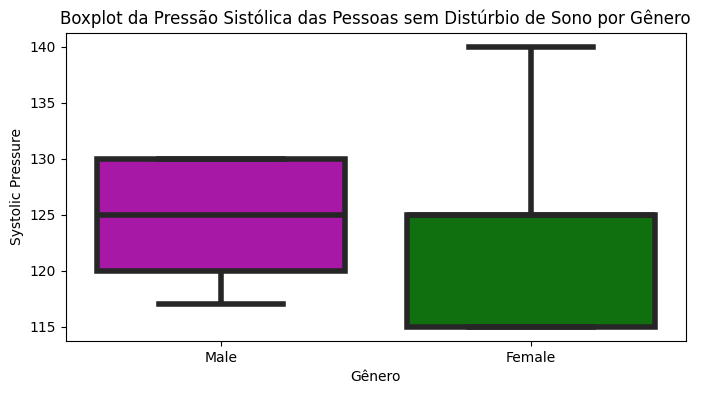

In [52]:
plt.figure(figsize = (8,4))

sns.boxplot(x= 'Gender', y = 'Systolic Pressure', data = df_normal, hue='Gender', linewidth=4, palette=["m", "g"])
plt.xlabel('Gênero')
plt.ylabel('Systolic Pressure')
plt.title('Boxplot da Pressão Sistólica das Pessoas sem Distúrbio de Sono por Gênero')

plt.show()

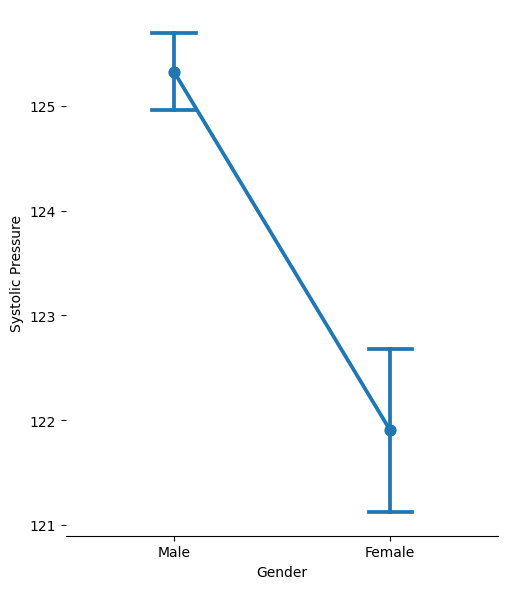

In [53]:
g = sns.catplot(data=df_normal, x='Gender', y="Systolic Pressure", capsize=.2,  errorbar="se",kind="point", height=6, aspect=.85,)
g.despine(left=True)
g.set_titles("Gráfico da Média da Pressão Sistólica das Pessoas sem Distúrbio do Sono por Gênero")

### **Teste Análise de Variância (ANOVA)**

Utilizada para comparar a variável de interesse com uma ou mais variáveis categóricas

Pressupostos:

1.   Variável resposta possui distribuição normal
2.   Homogeneidade das variâncias (variâncias parecidas)
3.   Amostras independentes.

Para essa etapa, vamos utilizar a amostra de pessoas sem distúrbio do sono por categoria do IMC.

In [54]:
normal_normal = df_normal.query('`BMI Category` == "Normal"')
normal_sobrepeso = df_normal.query('`BMI Category` == "Overweight"')
normal_obeso = df_normal.query('`BMI Category` == "Obese"')
#Obs.: Não há pessoas obesas sem distúrbio de sono no banco de dados

#### **Teste de Homocedasticidade**

* **H0:** A variância da pressão sistólica das pessoas sem distúrbio de sono é **igual** para qualquer tipo de classificação do IMC (normal, sobrepeso, obeso)

* **H1:** Pelo menos uma comparação **difere**;

In [55]:
#Teste de Barlett
statistic, pvalue = stats.bartlett(normal_normal['Systolic Pressure'], normal_sobrepeso['Systolic Pressure'])
print(f'Statistic: {statistic}')
print(f'P-value: {pvalue}')

Statistic: 1.271713081587496
P-value: 0.2594455528297739


*Resultado: p-valor > 0.05*

**Interpretação**

Não se rejeita a hipótese nula. Isto é, não há evidências para afirmar que a variância da pressão sistólica das pessoas sem distúrbio de sono difere a depender da classificação do IMC a um nível de 5% de significância.

#### **Realizando o Teste ANOVA**

Hipóteses:

* **H0:** A pressão sistólica média das pessoas sem distúrbio do sono não difere pela classificação do IMC.

* **H1:** Pelo menos uma média difere.

In [56]:
anova = df_normal.anova(dv = 'Systolic Pressure', between=['BMI Category'])
anova

,Source,ddof1,ddof2,F,p-unc,np2
0,BMI Category,1,217,36.689228,6.041858e-09,0.144623


*Resultado: p-valor (p-unc) < 0.05*

**Interpretação:**

Rejeita-se a hipótese nula. Ou seja, a pressão sistólica média das pessoas sem distúrbio do sono difere pela classificação do IMC.

Pode-se ver essa diferença no gráfico das médias abaixo.

<ipython-input-57-4e3ed1cf9978>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.catplot(data=df_normal, x="BMI Category", y="Systolic Pressure", hue="BMI Category",


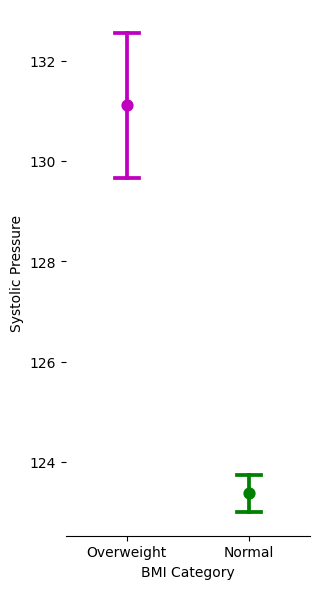

In [57]:
g = sns.catplot(data=df_normal, x="BMI Category", y="Systolic Pressure", hue="BMI Category",
    capsize=.2, errorbar="se", palette=["m", "g", "r"], kind="point", height=6, aspect=.55,)
g.despine(left=True)

### **Teste ANOVA comparando mais de uma váriavel independente**

In [58]:
anova = df_normal.anova(dv='Systolic Pressure', between=['BMI Category','Gender'])
anova

,Source,SS,DF,MS,F,p-unc,np2
0,BMI Category,1274.541470,1.0,1274.541470,59.490543,4.526259e-13,0.216731
1,Gender,839.767453,1.0,839.767453,39.197015,2.051742e-09,0.154199
2,BMI Category * Gender,686.678899,1.0,686.678899,32.051449,4.771423e-08,0.129736
3,Residual,4606.218121,215.0,21.424270,NaN,NaN,NaN


Resultados:

* *BMI Category: p-valor < 0.05*
* *Gender: p-valor < 0.05*
* *BMI Cateegory x Gender: p-valor < 0.05*

**Interpretação**

Ao nível de 5% de singnificância, a pressão sistólica das pessoas sem distúrbio do sono diferem por categoria do IMC, por gênero e também conjuntamente.

### **Teste de Comparação Múltipla de Tukey**

Hipóteses:

* **H0:** A pressão sistólica das pessoas sem distúrbio de sono não difere entre as pessoas com peso normal e sobrepeso;

* **H1:** As médias diferem.

In [59]:
df_normal.pairwise_tests(dv='Systolic Pressure', between=['BMI Category'], effsize='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,none
0,BMI Category,Normal,Overweight,False,True,-5.184412,20.41721,two-sided,0.000042,2.364e+04,-1.454118


*Resultado:*

*p-valor (p-unc) < 0.05*

**Interpretação**

Rejeita-se a hipótese nula. Isto é, realizando o teste de comparação múltipla de Tukey, foi verificado que a pressão sistólica das pessoas sem distúrbio de sono difere quanto a classificação do IMC (normal e sobrepeso), ao nível de 5% de significância.

### **Teste Qui-Quadrado de Independência**

Utilizado para testar se duas variáveis representadas em uma tabela de contigência são independentes entre si. Ou seja, verificar se as proporções das diversas categorias de uma variável difere nas categorias da outra variável.

**Ex.:** Verificar se a proporção de pessoas sem distúrbio do sono diferencia entre homens e mulheres.

#### **Separando a tabela que será testada**

In [74]:
CroosGeneroRelativa=pd.crosstab(df_sleep.Gender, df_sleep['Sleep Disorder'], normalize='columns', margins=True).round(3)*100
CroosGeneroRelativa

Sleep Disorder,Insomnia,Normal,Sleep Apnea,All
Gender,,,,
Female,46.8,37.4,85.9,49.5
Male,53.2,62.6,14.1,50.5


#### **Realizando o Teste Qui-Quadrado pelo Scipy**

Hipóteses:

* **H0:** Proporções são parecidas;
* **H1:** Proporções diferem em pelo menos uma categoria.

In [61]:
from scipy.stats import chi2_contingency

In [62]:
expected, observed, stats = pg.chi2_independence(df_sleep, x='Gender', y='Sleep Disorder')

In [67]:
esperado = expected.round(15)
esperado

Sleep Disorder,Insomnia,Normal,Sleep Apnea
Gender,,,
Female,38.088235,108.328877,38.582888
Male,38.911765,110.671123,39.417112


In [66]:
teste_qui_quadrado = stats
teste_qui_quadrado

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,54.306020,2.0,1.612863e-12,0.381055,1.0
1,cressie-read,0.666667,55.214249,2.0,1.024184e-12,0.384229,1.0
2,log-likelihood,0.000000,58.910790,2.0,1.613186e-13,0.396882,1.0
3,freeman-tukey,-0.500000,63.830527,2.0,1.378406e-14,0.413122,1.0
4,mod-log-likelihood,-1.000000,71.347506,2.0,3.214296e-16,0.436771,1.0
5,neyman,-2.000000,99.205939,2.0,2.868826e-22,0.515031,1.0


*Resultado: p-valor < 0.05*

**Interpretação**

Rejeita-se a hipótese nula. Por meio do teste qui-quadrado de Pearson, foi obsevado diferença entre as proporções de pessoas por gênero e distúrbio do sono. Ou seja, os homens sem distúrbio de sono possuem uma proporção maior (62,6%) que as mulheres (37,4%). Já quanto a apneia, a distribuição é de 85,9% para as mulheres contra 41,1% dos homens. E a insônia possui uma proporção de 53,2% para os homens contra 46,8% das mulheres.

### **Teste de Correlação**

Pressupostos:


Se o teste for o de Pearson, pelo menos uma da variável tem que ter distribuição normal. Já o de Spearman, não precisa ter distribuição normal.

* **H0:** $\rho = 0,$ ou seja, não existe uma correlação importante

* **H1:** $\rho \neq 0,$ a correlação é importante

In [77]:
df_normal['Systolic Pressure'].corr(df_normal['Physical Activity Level'], method='pearson')

0.09495110950094209

In [79]:
pg.corr(df_normal['Systolic Pressure'], df_normal['Physical Activity Level'], method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,219,0.094951,"[-0.04, 0.22]",0.161432,0.224,0.288916


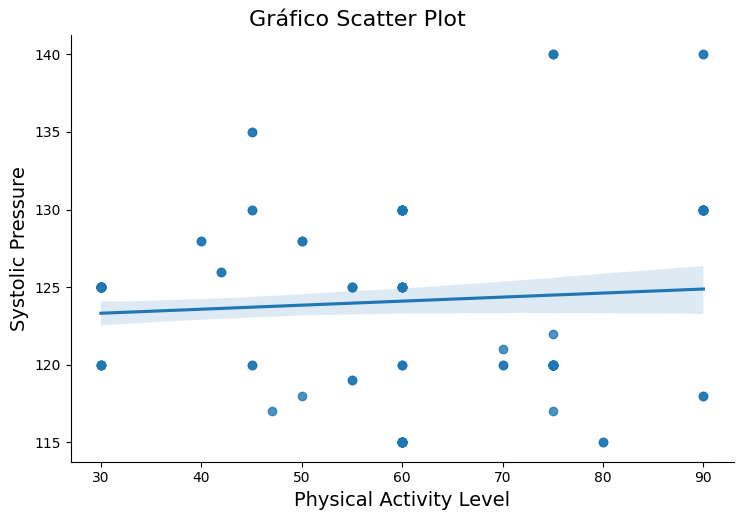

In [82]:
ax = sns.lmplot(x="Physical Activity Level", y="Systolic Pressure", data=df_normal)
ax.fig.set_size_inches(8,5)
ax.fig.suptitle('Gráfico Scatter Plot', fontsize=16, y=1.02)
ax.set_xlabels("Physical Activity Level", fontsize=14)
ax.set_ylabels("Systolic Pressure", fontsize=14)
ax

*Resultado:
* *$\rho$ = 0.0949*
* *p-valor > 0.05*

**Interpretação**

O $\rho$ positivo indica uma relação direta, à medida que o nível de atividade física aumenta, a pressão sistólica também aumenta. Contudo, como o valor é próximo de zero, essa relação é fraca. Ademais, o p-valor maior que 0.05 indica que a correlação não é estatisticamente significante.


### **Regressão Linear**

A regressão linear é uma equação utilizada para se estimar a condicional de uma variável y, dados os valores de algumas outras variáveis x. A regressão, em geral, tem como objetivo tratar de um valor que não se consegue estimar inicialmente.

#### **Regressão Linear Simples**

A equação da regressão linear simples estimada é dada por:

$ŷ= \beta_0\ + \beta_1 x_1 + ϵ,$

Em que:

* ŷ é o valor da variável resposta ou característica principal;
* $\beta$ é o quanto y é influenciado por cada unidade de x;
* $ϵ$ é a influência de outras variáveis que não estão no modelo.

In [89]:
lmSistolica = pg.linear_regression(df_sleep['Physical Activity Level'],df_sleep['Systolic Pressure'])
lmSistolica

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,122.711940,1.166198,105.223908,7.055380e-279,0.070446,0.067947,120.418773,125.005108
1,Physical Activity Level,0.098723,0.018593,5.309592,1.894063e-07,0.070446,0.067947,0.062162,0.135284


In [91]:
#Para um nível de atividade de 90 min/dia, qual seria a pressão sistólica do indivíduo?
y = 122.71 + 0.098 * 90
y

131.53

**Interpretação**

A relação existente entre a pressão sistólica e a variável nível de atividade física pode ser descrita pela equação:

$ŷ= 122.71 + 0.098 x_1 + ϵ$

Observa-se através da regressão linear simples que todos os coeficientes foram signinifantes ao nível de 5% de significância (p-valor < 0.05).

A cada minuto adicional de atividade física, aumenta a pressão em 0.098.

O coeficiente de determinação foi de $r^2=7,04\%$; isto é, somente 7,04% da variação da pressão sistólica pode ser explicada pela variável nível de atividade física. A adição de novas variáveis ao modelo pode melhorar esse coeficiente.

#### **Regressão Linear Múltipla**

A equação da regressão linear múltipla apresenta mais variáveis independentes (x) que influenciam a variável dependente (y).

$ŷ=\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + ... + ϵ$

In [96]:
lmSistolica = pg.linear_regression(df_sleep[['Physical Activity Level', 'Age', 'Stress Level', 'Daily Steps']],df_sleep['Systolic Pressure'])
lmSistolica

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,90.292015,2.057638,43.881382,1.670148e-148,0.592507,0.58809,86.245847,94.338183
1,Physical Activity Level,0.160509,0.020425,7.858599,4.300910e-14,0.592507,0.58809,0.120346,0.200672
2,Age,0.683793,0.033310,20.528229,5.205531e-63,0.592507,0.58809,0.618292,0.749294
3,Stress Level,2.226387,0.168753,13.193147,7.940191e-33,0.592507,0.58809,1.894548,2.558226
4,Daily Steps,-0.001771,0.000266,-6.650829,1.052857e-10,0.592507,0.58809,-0.002294,-0.001247


In [97]:
#Para um nível de atividade de 90 min/dia, 35 anos, nível de estresse 7, e 3.000 passos diários, qual seria a pressão sistólica do indivíduo?
y = 90.292 + 0.1605 * 90 + 0.6937 * 35 + 2.2263 * 7 - 0.0017 * 3000
y

139.50060000000002

**Interpretação**

A relação existente entre a pressão sistólica e as variáveis nível de atividade física, idade, nível de estresse e passos diários pode ser descrita pela equação:

$ŷ= 90.292 + 0.1605 x_1 + 0.6837 x_2 + 2.2263 x_3 - 0.0017 x_4 ϵ$

Observa-se através da regressão linear múltipla que todos os coeficientes foram signinifantes ao nível de 5% de significância (p-valor < 0.05).

A cada minuto adicional de atividade física, aumenta a pressão em 0.1605; a cada ano de idade, a pressão aumenta em 0.6937; a cada nível de estresse (numa escala de 1-10), a pressão aumenta em 2.2263; a cada passo diário adicional, a pressão diminui em 0.0017.

O coeficiente de determinação foi de $r^2=59,2\%$; isto é, 59,2% da variação da pressão sistólica pode ser explicada pelas variáveis do modelo.